In [39]:
#loading dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [40]:
len(train_data)

8982

In [41]:
len(test_data)

2246

In [42]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [43]:
#encodings->text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in     train_data[0]])

In [44]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [45]:
train_labels[10]

3

In [46]:
#vectorizing data
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [47]:
#encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels) 

In [48]:
#defining and compiling the model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [49]:
#splitting data for validation
x_val = x_train[:1000]
p_x_train = x_train[1000:]
y_val = y_train[:1000]
p_y_train = y_train[1000:]

In [50]:
#training the model
history = model.fit(p_x_train,
                    p_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.6284 - accuracy: 0.5311 - val_loss: 1.7310 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 1.4060 - accuracy: 0.7096 - val_loss: 1.3164 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.0346 - accuracy: 0.7848 - val_loss: 1.1614 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.8131 - accuracy: 0.8285 - val_loss: 1.0394 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6390 - accuracy: 0.8609 - val_loss: 0.9742 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 38ms/step - loss: 0.5087 - accuracy: 0.8946 - val_loss: 0.9370 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4051 - accuracy: 0.9149 - val_loss: 0.9565 - val_accuracy: 0.7990
Epoch 8/20
16

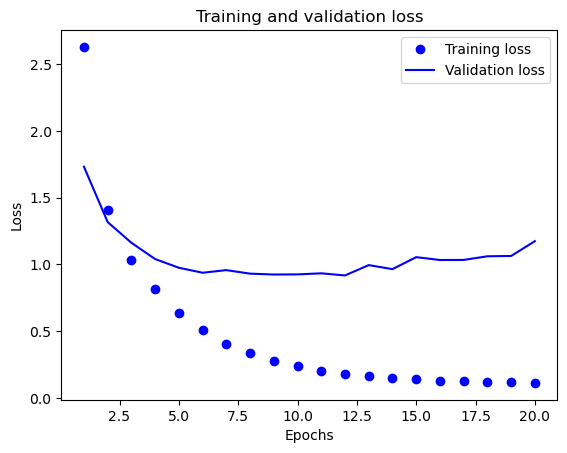

In [51]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

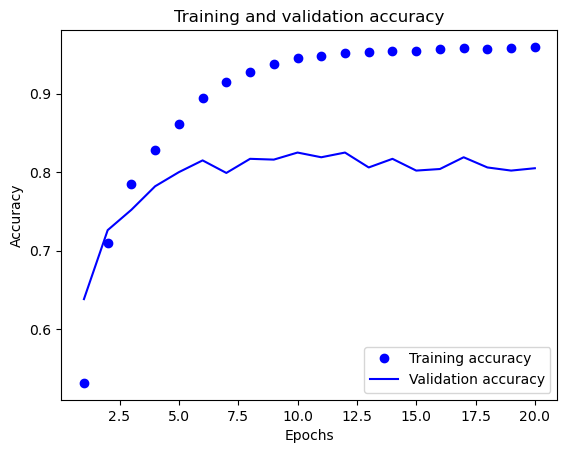

In [52]:
plt.clf()                     
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
#retraining model with 9 epochs to avoid overfitting
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 28ms/step - loss: 2.5926 - accuracy: 0.5165
Epoch 2/9
18/18 [==============================] - 0s 28ms/step - loss: 1.3933 - accuracy: 0.7061
Epoch 3/9
18/18 [==============================] - 1s 29ms/step - loss: 1.0244 - accuracy: 0.7740
Epoch 4/9
18/18 [==============================] - 1s 27ms/step - loss: 0.7983 - accuracy: 0.8313
Epoch 5/9
18/18 [==============================] - 0s 27ms/step - loss: 0.6302 - accuracy: 0.8701
Epoch 6/9
18/18 [==============================] - 1s 28ms/step - loss: 0.5046 - accuracy: 0.8963
Epoch 7/9
18/18 [==============================] - 0s 27ms/step - loss: 0.4067 - accuracy: 0.9178
Epoch 8/9
18/18 [==============================] - 1s 28ms/step - loss: 0.3327 - accuracy: 0.9286
Epoch 9/9
71/71 [==============================] - 1s 3ms/step - loss: 0.9340 - accuracy: 0.7925


In [55]:
results

[0.9340015649795532, 0.7925200462341309]

In [56]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18432769367764915

In [63]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 4ms/step


(46,)

In [64]:
np.sum(predictions[0])

1.0

In [65]:
np.argmax(predictions[0])

3

In [61]:
# the need for large intermediate layers as information gets crammed into 4dimensional representations as specified in second layer which resulted in lower accuracy than previous model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(p_x_train,
          p_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 22ms/step - loss: 2.8099 - accuracy: 0.3693 - val_loss: 2.0352 - val_accuracy: 0.5550
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.6840 - accuracy: 0.5930 - val_loss: 1.5701 - val_accuracy: 0.5960
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.3627 - accuracy: 0.6352 - val_loss: 1.4595 - val_accuracy: 0.6330
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1915 - accuracy: 0.6833 - val_loss: 1.4221 - val_accuracy: 0.6500
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0655 - accuracy: 0.7060 - val_loss: 1.3810 - val_accuracy: 0.6640
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.9629 - accuracy: 0.7328 - val_loss: 1.3253 - val_accuracy: 0.6780
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8759 - accuracy: 0.7610 - val_loss: 1.3187 - val_accuracy: 0.6980
Epoch 8/20
63